# Image classification with neural network

### Importing Images

In [51]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Image Transofmrations

This part of the code transforms the images to 64 x 64 pixels, converts the images to tensors, and normalizes the image pixel values. 

In [53]:
img_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

img_dataset = ImageFolder(root='EuroSAT_RGB', transform=img_transform)

### Training/Test Split and Data Loader

In the next part of the code, the image dataset is split into an 80/20 training/testing split. The train and test dataset is then loaded by the data loader in a batch size of 64 images per batch. 

In [55]:
train_len = int(0.8 * len(img_dataset))
test_len = len(img_dataset) - train_len
train_set, test_set = random_split(img_dataset, [train_len, test_len])

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

### Simple Convolutional Neural Network Class

In this part of the code, we define our different classes for the Simple CNN model. The sampled images pass through the three layers of the Convolutional Neural Network, passing through the RelU activation function and max pooling. Subsequently, the image is flattened and passed through the fully connected layers to formulate a classification prediction. 

In [57]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, len(img_dataset.classes))

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Model, Loss Function, and Optimizer

In this part of the code, we initialize the Simple Convolutional Neural Network Model, set the loss function to cross entropy loss, and initialize the Adam Optimizer with a learning rate of 0.001. 

In [59]:
model = CustomCNN()
loss_func = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr=0.005)

### Training Loop, Model Evaluation, and Data Visualisation

The purpose of the following block is to train the model for ten epochs. After each epoch, the model makes its predictions and the total loss is calculated. The model tracks the running total of the loss after each epoch in order to analyze model performance over time. Further, after each epoch, the model is evaluated on the test set and visualizes the predictions for a few sample images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


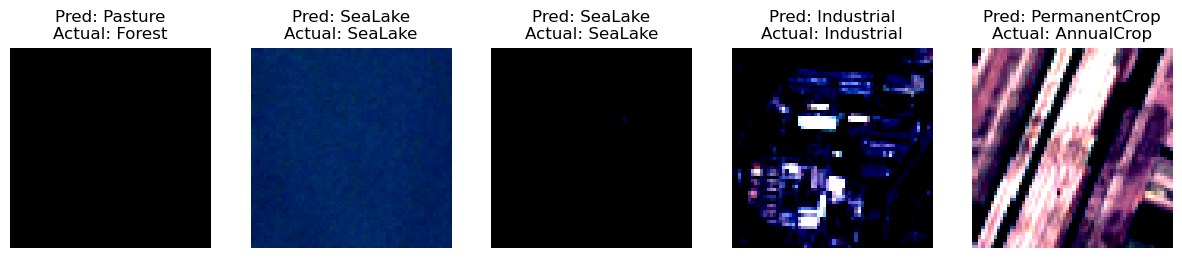

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


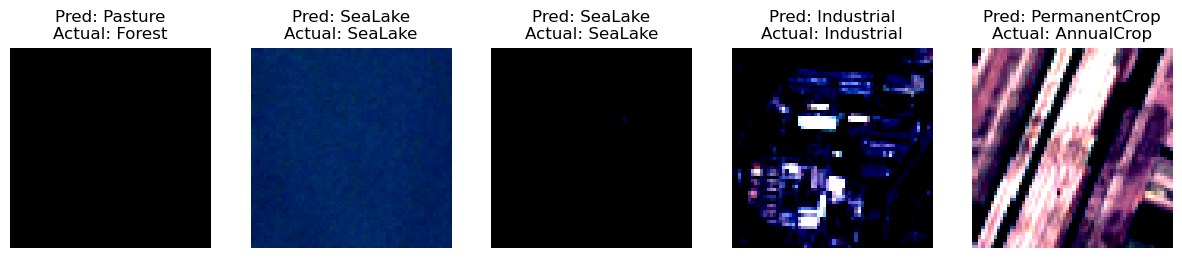

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


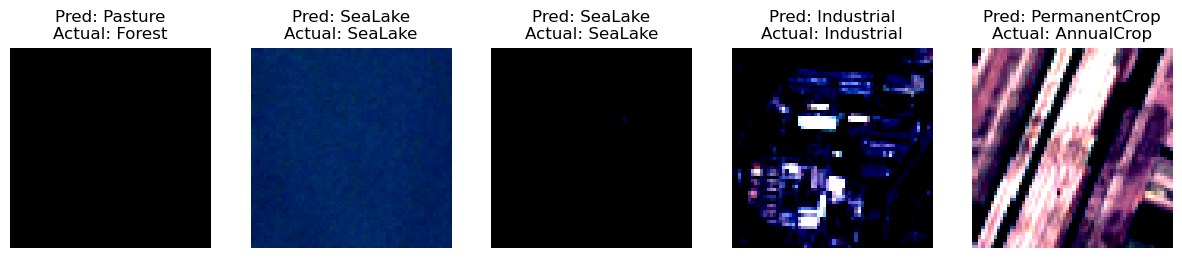

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


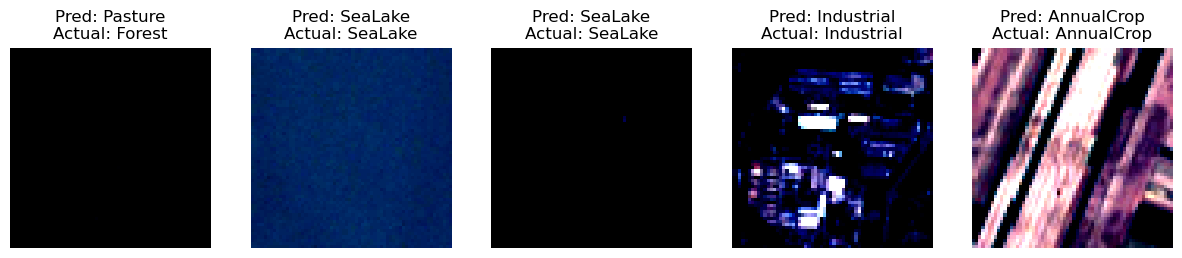

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


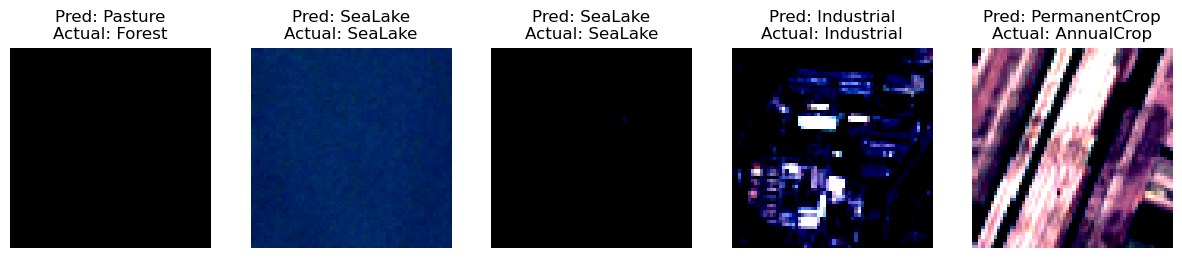

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


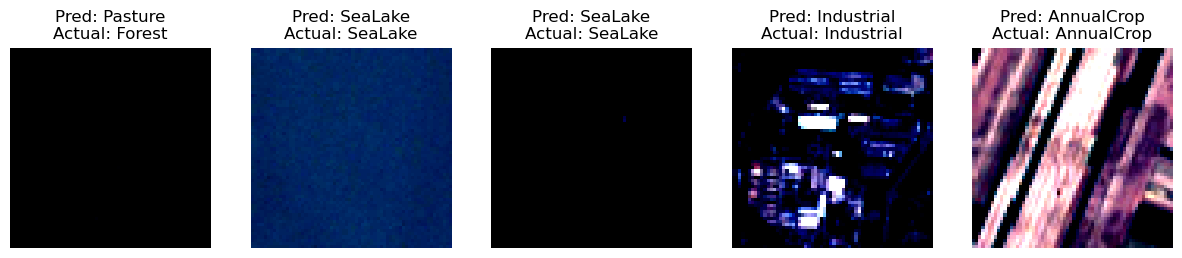

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


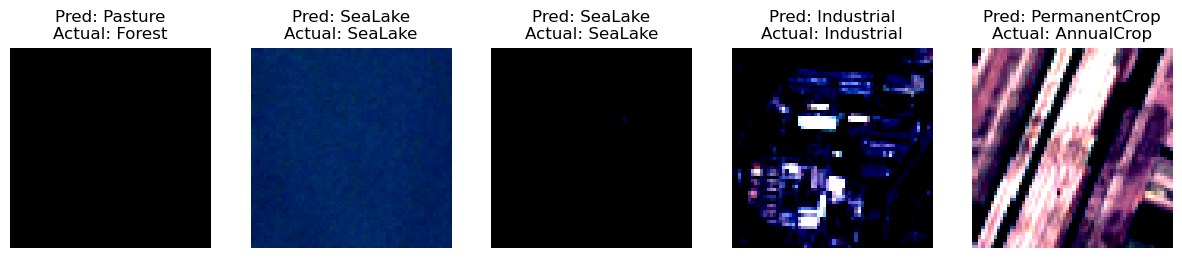

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


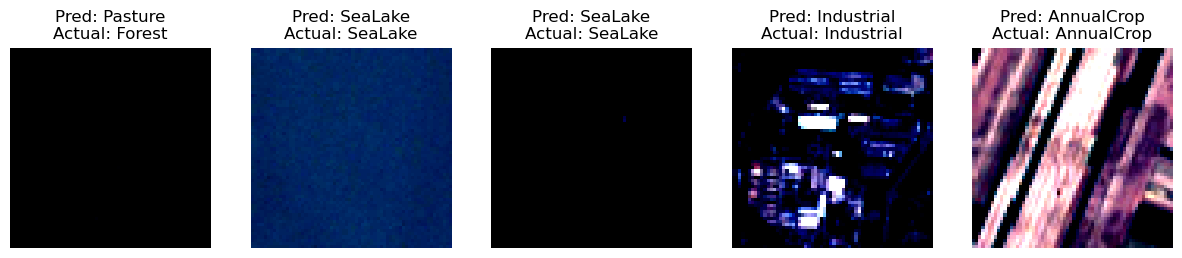

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


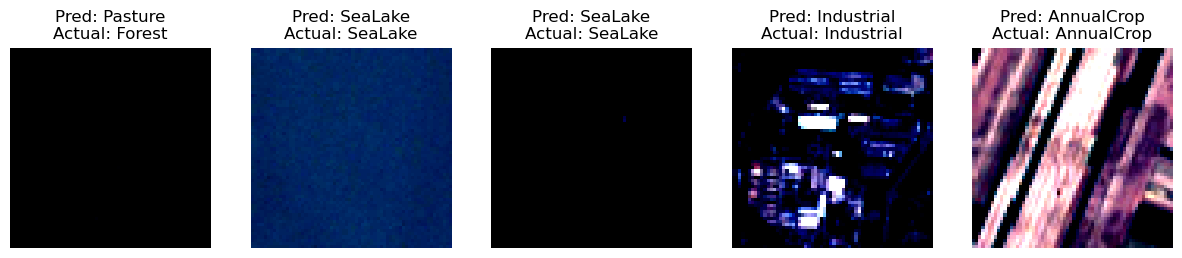

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


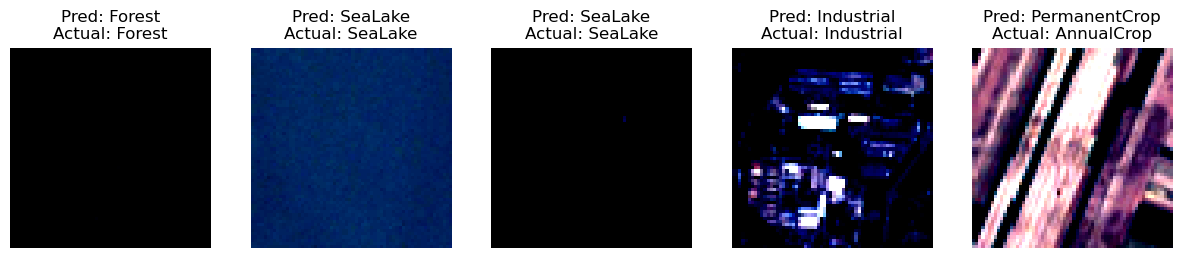

In [61]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for imgs, lbls in train_loader:
        optim.zero_grad()
        preds = model(imgs)
        loss = loss_func(preds, lbls)
        loss.backward()
        optim.step()
        total_loss += loss.item()

    model.eval()
    with torch.no_grad():
        imgs, lbls = next(iter(test_loader))
        preds = model(imgs)
        _, pred_classes = torch.max(preds, 1)
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        for i in range(5):
            axes[i].imshow(imgs[i].permute(1, 2, 0).numpy())
            axes[i].set_title(f"Pred: {img_dataset.classes[pred_classes[i]]}\nActual: {img_dataset.classes[lbls[i]]}")
            axes[i].axis('off')
        plt.show()

    

### Model Test Accuracy

This part of the code evaluates the overall test accuracy of the model. It compares all of the predictions with all of the actual labels of each image, then provides an accuracy score that denotes how many times the model correctly predicted the label of the picture.

In [63]:
model.eval()
pred_list = []
label_list = []
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for imgs, lbls in test_loader:
        preds = model(imgs)
        _, pred_classes = torch.max(preds, 1)
        pred_list.extend(pred_classes.cpu().numpy())
        label_list.extend(lbls.cpu().numpy())
        correct_preds += (pred_classes == lbls).sum().item()
        total_preds += lbls.size(0)

accuracy = correct_preds / total_preds
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 83.24%


### Model Confusion Matrix

The confusion matrix of the model is outlined below. 

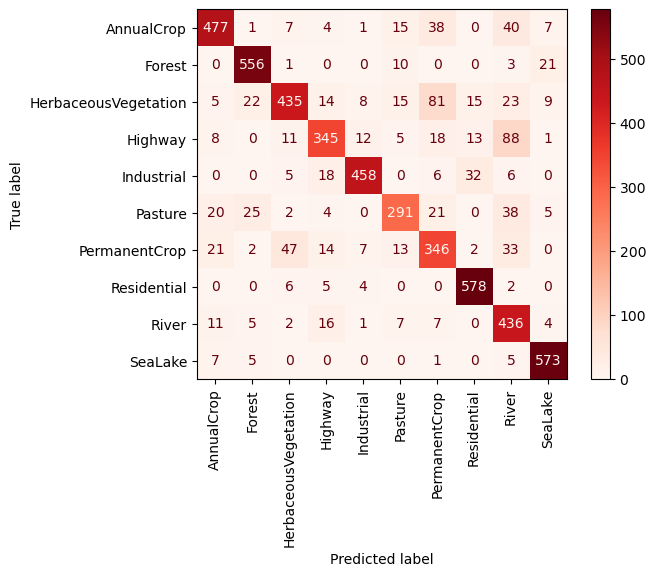

In [65]:
cmatrix = confusion_matrix(label_list, pred_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=img_dataset.classes)
disp.plot(cmap=plt.cm.Reds)
plt.xticks(rotation = 90)
plt.show()